<h1>Simple is good: Text Classification with Naïve Bayes</h1>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from string import punctuation
import nltk


In [5]:
#We need to prepare the text for machine learning.
# This means these steps:
# 1. Tokenize the text. Make the tekst and array of words where all none alphatic characters
#    are removed
# 2. Remove stop words. Meaning we remove all words that are not import for the specific context.

# 3. Stemming. Get rid of all inflections of the words. What you are left with are the roots
#    of the words. Ex: "Words" and "Wording" -> "word, word" and there count as the same



In [22]:
# Helper functions to clean the data.

def getTokens(s):
    words = nltk.word_tokenize(s)
    words = [word.lower() for word in words if word.isalpha()]
    return words

#Method that removes irrelevant words defined beforehand in a list
#takes an array of words.
def remove_stop_words(words):
    with open('stopwords.txt') as f:
        stopwords = f.read().splitlines()
        return [w for w in words if w not in stopwords]

        
def remove_punctuation(s):
    global punctuation
    for p in punctuation:
        s = s.replace('-',' ')
        s = s.replace('/',' ')
        s = s.replace(p, '')
        s = s.replace('¨','')
    return s

def word_roots(words,wdf): 
    result = []
    for word in words:
        #Find the row, where the word is.
        row = wdf.loc[wdf['inflection']==word]
        if len(row):
            #The lemma of the word is in the first column
            lemma = row.iloc[0]['root'].replace('1. ', '') \
                                       .replace('2. ', '') \
                                       .replace('3. ', '')
            result.append(lemma)
        else:
            result.append(word)
    return result


In [40]:
#Load the data
df = pd.read_csv('jobs.csv',delimiter=',')
df['clean_title'] = df['job_title'].map(remove_punctuation)
df['clean_title'] = df['clean_title'].map(getTokens)

df['clean_title'] = df['clean_title'].map(remove_stop_words)

#This takes a very long time because of the inefficient algorithm, that runs in numWords X numWordsInDanishLanguage.
wdf = pd.read_csv('fuldformer.txt', delimiter=';', names=["root","inflection","gender"])
df['clean_title'] = df['clean_title'].map(lambda words: word_roots(words,wdf))
df['clean_title'] = df['clean_title'].map(lambda words: " ".join(words))

df = df.dropna()


In [41]:
df.head()


,job_title,job_category,clean_title
0,Køkkenassistent søges,1,køkkenassistent
1,Vores kunde i Haderslev søger snedkere (Try & ...,2,kunde haderslev snedker try hire
2,Dygtig og stabil snedker søges,2,dygtig stabil snedker
3,Maskinsnedker til kantlimer og gennemløbsborem...,2,maskinsnedker kantlimer gennemløbsboremaskine
4,Værkmester/elev søges til Enner Mark Fængsel,2,værkmester elev enner mark fængsel


              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       1.00      0.09      0.17        11
           4       0.00      0.00      0.00         9
           5       0.80      0.74      0.77        58
           6       0.81      0.85      0.83       107
           7       0.74      0.96      0.84       186
           8       1.00      0.15      0.27        13
           9       0.85      0.95      0.90       185
          10       0.00      0.00      0.00         2
          11       0.93      0.77      0.84        97
          12       0.84      0.77      0.81        70
          14       0.96      0.53      0.69        45

    accuracy                           0.82       787
   macro avg       0.66      0.49      0.51       787
weighted avg       0.82      0.82      0.80       787



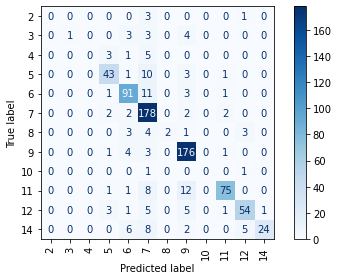

In [42]:
#NU kan vi begynde machine learning.
X = np.array(df.loc[:, 'clean_title'])
y = np.array(df.loc[:, 'job_category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
nb_mult_model = MultinomialNB().fit(X_train_counts, y_train)
predicted = nb_mult_model.predict(X_test_counts)

print(classification_report(y_test, predicted))
plot_confusion_matrix(nb_mult_model, 
                      X_test_counts, y_test,
                      cmap=plt.cm.Blues,
                      xticks_rotation='vertical')
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = 40,30
plt.tight_layout()
plt.show()